# Выбор локации для скважины

**Описание проекта**

Предоставлены данные добывающей компанией «ГлавРосГосНефть» о пробах нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. 

**Цель проекта**

Требуется постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. 

Необходимо проанализировать возможную прибыль и риски.

**Шаги для выбора локации**

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

**Описание данных**

*Признаки*

- id — уникальный идентификатор скважины;
- f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);

*Целевой признак*
- product — объём запасов в скважине (тыс. баррелей).

**Условия задачи**

- Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

Данные синтетические: детали контрактов и характеристики месторождений не разглашаются.

## Загрузка и подготовка данных

Импортируем библиотеки и функции.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

Загрузим файлы.

In [2]:
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')

Напишем функцию для получения информации по предоставленным данным.

In [3]:
def getting_information_about_data(df):
    print()
    print(df.head())
    print()
    print(df.info())
    print()
    print(df.describe())
    print()
    df['product'].hist(bins = 100);
    plt.show()

Получим информацию по предоставленным данным.

Информация по geo_data_0

      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.

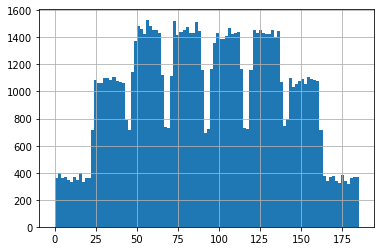

In [4]:
print('Информация по geo_data_0')
getting_information_about_data(geo_data_0)

Информация по geo_data_1

      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965

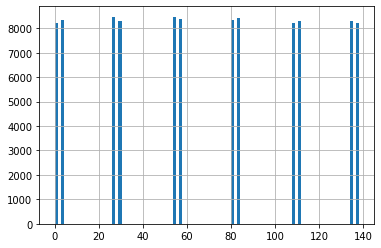

In [5]:
print('Информация по geo_data_1')
getting_information_about_data(geo_data_1)

Информация по geo_data_2

      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.002023      -0.002081       2.495128      95.000000
std         1.732045       1.

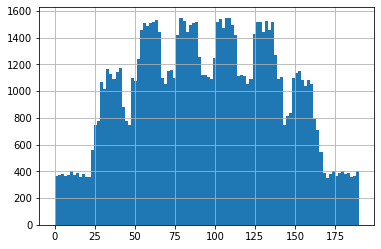

In [6]:
print('Информация по geo_data_2')
getting_information_about_data(geo_data_2)

Проверим на наличие дубликатов в данных geo_data_0.

In [7]:
geo_data_0.duplicated().sum()

0

Полные дубликаты отсутствуют. Проверим наличие дубликатов по id.

In [8]:
geo_data_0['id'].duplicated().sum()

10

Найдено 10 дубликатов. Удалим соответствующие строки.

In [9]:
geo_data_0 = geo_data_0.drop_duplicates(subset=['id'], keep='first')

Проверим на наличие дубликатов в данных geo_data_1.

In [10]:
geo_data_1.duplicated().sum()

0

Полные дубликаты отсутствуют. Проверим наличие дубликатов по id.

In [11]:
geo_data_1['id'].duplicated().sum()

4

Найдено 4 дубликата. Удалим соответствующие строки.

In [12]:
geo_data_1 = geo_data_1.drop_duplicates(subset=['id'], keep='first')

Проверим на наличие дубликатов в данных geo_data_2.

In [13]:
geo_data_2.duplicated().sum()

0

Полные дубликаты отсутствуют. Проверим наличие дубликатов по id.

In [14]:
geo_data_2['id'].duplicated().sum()

4

Найдено 4 дубликата. Удалим соответствующие строки.

In [15]:
geo_data_2 = geo_data_2.drop_duplicates(subset=['id'], keep='first')

**Вывод:**

Были загруженны данные. 
Изученна информация. 
Была проведена проверка на дубликаты.
Удалены сроки с дубликатами по id.

## Обучение и проверка модели

Напишем функцию для обучения и проверки моделей.

In [16]:
def model_training_and_validation(geo_data):
    #Разделим данные на целевой признак и все остальные.
    target_geo_data = geo_data['product']
    features_geo_data = geo_data.drop(['id','product'],axis=1)
    
    #Разобьем данные на обучающую и валидационную выборки в соотношении 75:25
    features_train_geo_data, features_valid_geo_data, target_train_geo_data, target_valid_geo_data = train_test_split(features_geo_data, target_geo_data, test_size = 0.25, random_state = 12345)
    
    #Приведем численные признаки к одному масштабу.
    numeric = ['f0','f1','f2']
    scaler = StandardScaler()
    scaler.fit(features_train_geo_data.loc[:,numeric])
    features_train_geo_data.loc[:,numeric] = scaler.transform(features_train_geo_data.loc[:,numeric])
    features_valid_geo_data.loc[:,numeric] = scaler.transform(features_valid_geo_data.loc[:,numeric])  
    
    #Обучим модели. Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые)
    model = LinearRegression()
    model.fit(features_train_geo_data, target_train_geo_data)
    predictions_valid = model.predict(features_valid_geo_data)
    
    mean_prediction_margin = round(predictions_valid.mean(),2)
    rmse = mean_squared_error(target_valid_geo_data, predictions_valid)**0.5
    
    return target_valid_geo_data, predictions_valid, mean_prediction_margin, rmse

In [17]:
print('Данные по первому региону')
target_valid_geo_data_0, predictions_valid_0, mean_prediction_margin_0, rmse_0 = model_training_and_validation(geo_data_0)
print('Средний запас предсказания', mean_prediction_margin_0)
print('RMSE модели', rmse_0)

Данные по первому региону
Средний запас предсказания 92.79
RMSE модели 37.853527328872964


/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [18]:
print('Данные по второму региону')
target_valid_geo_data_1, predictions_valid_1, mean_prediction_margin_1, rmse_1 = model_training_and_validation(geo_data_1)
print('Средний запас предсказания', mean_prediction_margin_1)
print('RMSE модели', rmse_1)

Данные по второму региону
Средний запас предсказания 69.18
RMSE модели 0.8920592647717033


/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [19]:
print('Данные по третьему региону')
target_valid_geo_data_2, predictions_valid_2, mean_prediction_margin_2, rmse_2 = model_training_and_validation(geo_data_2)
print('Средний запас предсказания', mean_prediction_margin_2)
print('RMSE модели', rmse_2)

Данные по третьему региону
Средний запас предсказания 94.87
RMSE модели 40.07585073246016


/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

Обучим модели. Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые)

**Вывод:**

1. Разделили данные на целевой признак и все остальные. Разбили данные на обучающую и валидационную выборки в соотношении 75:25.
2. Привели численные признаки к одному масштабу.
3. Обучим модели. Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
4. Посчитали средний запас предсказанного сырья и RMSE моделей. 

   Для первого региона средний запас предсказания 92.79, RMSE модели 37.85.
   
   Для второго региона средний запас предсказания 69.18, RMSE модели 0.89.
   
   Для первого региона средний запас предсказания 94.87, RMSE модели 40.08.

## Подготовка к расчёту прибыли

Все ключевые значения для расчётов сохраним в отдельных переменных.

In [20]:
WELL_DEVELOPMENT_BUDGET_IS_BILLIONS = 10000000000
REVENUE_PER_UNIT_OF_PRODUCT = 450000
NUMBER_OF_POINTS_TO_EXPLORE = 200

Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины. 

Бюджет для одной точки

In [21]:
BUDGET_FOR_ONE_POINT = WELL_DEVELOPMENT_BUDGET_IS_BILLIONS/NUMBER_OF_POINTS_TO_EXPLORE
BUDGET_FOR_ONE_POINT

50000000.0

Сколько тыс. баррелей должно быть в одной точке, чтобы не было убытков

In [22]:
round(BUDGET_FOR_ONE_POINT/REVENUE_PER_UNIT_OF_PRODUCT,2)

111.11

Сравним полученный объём сырья со средним запасом в каждом регионе. 
Средний запас предсказания для geo_data_0 равно 92.79, для geo_data_1 равно 69.18, для geo_data_2 равно 94.87.
По всем трем регионам средний запас предсказания меньше, чем требуемое значене для безубыточной разработки.

**Вывод:**

1. Все ключевые значения для расчётов сохранили в отдельных переменных.
2. Рассчитали достаточный объём сырья для безубыточной разработки новой скважины. 111.11 тыс. баррелей должно быть в одной точке, чтобы не было убытков.
3. Средний запас предсказания для geo_data_0 равно 92.79, для geo_data_1 равно 69.18, для geo_data_2 равно 94.87. По всем трем регионам средний запас предсказания меньше, чем требуемое значене для безубыточной разработки.

## Расчёт прибыли и рисков 

Написание функции для расчета прибыли

In [23]:
def profit_calculation(pred, target): 
    pred = pred.reset_index(drop = True)
    target = target.reset_index(drop = True)
    target_sorted = target[pred.sort_values(ascending = False)[:NUMBER_OF_POINTS_TO_EXPLORE].index]
    return REVENUE_PER_UNIT_OF_PRODUCT * target_sorted.sum() - WELL_DEVELOPMENT_BUDGET_IS_BILLIONS 

In [24]:
predictions_valid_0 = pd.Series(predictions_valid_0, target_valid_geo_data_0.index)
predictions_valid_1 = pd.Series(predictions_valid_1, target_valid_geo_data_1.index)
predictions_valid_2 = pd.Series(predictions_valid_2, target_valid_geo_data_2.index)

Написание функции для подсчета рисков и прибыли для каждого региона.

In [25]:
state = np.random.RandomState(12345)
number_of_samples = 1000

def bootstrap(target,predictions):

    values = []
    for i in range(number_of_samples):
        target_subsample = target.sample(n=500,replace=True,random_state=state)
        predictions_subsample = predictions[target_subsample.index]
        profit = profit_calculation(predictions_subsample,target_subsample)

        values.append(profit)

    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    mean_value = values.mean()
    risk_of_losses = (values < 0).mean()
    return lower, upper, mean_value, risk_of_losses

Посчитаем риски и прибыль для каждого региона.

In [26]:
lower_0, upper_0, mean_value_0, risk_of_losses_0 = bootstrap(target_valid_geo_data_0, predictions_valid_0)
print('Средняя прибыль: ', round(mean_value_0,2))
print('95%-й доверительный интервал от ', round(lower_0,2), ' до ', round(upper_0,2), 'руб.')
print('Риск убытков', round(risk_of_losses_0,2))

Средняя прибыль:  380613470.02
95%-й доверительный интервал от  -142942739.74  до  890976833.85 руб.
Риск убытков 0.08


In [27]:
lower_1, upper_1, mean_value_1, risk_of_losses_1 = bootstrap(target_valid_geo_data_1,predictions_valid_1)
print('Средняя прибыль: ', round(mean_value_1,2))
print('95%-й доверительный интервал от ', round(lower_1,2), ' до ', round(upper_1,2), 'руб.')
print('Риск убытков', round(risk_of_losses_1,2))

Средняя прибыль:  479159869.98
95%-й доверительный интервал от  73849212.02  до  917953817.72 руб.
Риск убытков 0.01


In [28]:
lower_2, upper_2, mean_value_2, risk_of_losses_2 = bootstrap(target_valid_geo_data_2,predictions_valid_2)
print('Средняя прибыль: ', round(mean_value_2,2))
print('95%-й доверительный интервал от ', round(lower_2,2), ' до ', round(upper_2,2), 'руб.')
print('Риск убытков', round(risk_of_losses_2,2))

Средняя прибыль:  315441916.02
95%-й доверительный интервал от  -216265050.03  до  811060708.24 руб.
Риск убытков 0.12


Самая большая прибыль у второго региона. Риск убытков у данного региона 0.01. 

**Вывод:**

1. Была написана функцим для расчёта прибыли по выбранным скважинам и предсказаниям модели.


2. Посчитаны риски и прибыль для каждого региона.
    
    2.1 Для первого региона:
   
        Средняя прибыль:  380613470.02
        95%-й доверительный интервал от  -142942739.74  до  890976833.85 руб.
        Риск убытков 0.08
    
    2.2 Для второго региона:
    
        Средняя прибыль:  479159869.98
        95%-й доверительный интервал от  73849212.02  до  917953817.72 руб.
        Риск убытков 0.01
    
    2.3 Для третьего региона:

        Средняя прибыль:  315441916.02
        95%-й доверительный интервал от  -216265050.03  до  811060708.24 руб.
        Риск убытков 0.12
        
    Самая большая прибыль у второго региона. Риск убытков у данного региона 0.1. 

## Общий вывод

1. Загрузка и подготовка данных

    Были загруженны данные. 
    Изученна информация. 
    Была проведена проверка на дубликаты.
    Удалены сроки с дубликатами по id.
    
    
2. Обучение и проверка модели

    2.1 Разделили данные на целевой признак и все остальные. Разбили данные на обучающую и валидационную выборки в соотношении 75:25.
    
    2.2 Привели численные признаки к одному масштабу.
    
    2.3 Обучим модели. Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
    
    2.4 Посчитали средний запас предсказанного сырья и RMSE моделей. 

       Для первого региона средний запас предсказания 92.79, RMSE модели 37.85.
       Для второго региона средний запас предсказания 69.18, RMSE модели 0.89.
       Для первого региона средний запас предсказания 94.87, RMSE модели 40.08.
       
3. Подготовка к расчёту прибыли

    3.1 Все ключевые значения для расчётов сохранили в отдельных переменных.
    
    3.2 Рассчитали достаточный объём сырья для безубыточной разработки новой скважины. 111.11 тыс. баррелей должно быть в одной точке, чтобы не было убытков.
    
    3.3 Средний запас предсказания для geo_data_0 равно 92.79, для geo_data_1 равно 69.18, для geo_data_2 равно 94.87. По всем трем регионам средний запас предсказания меньше, чем требуемое значене для безубыточной разработки.
    
    
4. Расчёт прибыли и рисков

    4.1 Была написана функцим для расчёта прибыли по выбранным скважинам и предсказаниям модели.


    4.2 Посчитаны риски и прибыль для каждого региона.
    
        4.2.1 Для первого региона:
   
            Средняя прибыль:  380613470.02
            95%-й доверительный интервал от  -142942739.74  до  890976833.85 руб.
            Риск убытков 0.08
    
        4.2.2 Для второго региона:
    
            Средняя прибыль:  479159869.98
            95%-й доверительный интервал от  73849212.02  до  917953817.72 руб.
            Риск убытков 0.01
    
        4.2.3 Для третьего региона:

            Средняя прибыль:  315441916.02
            95%-й доверительный интервал от  -216265050.03  до  811060708.24 руб.
            Риск убытков 0.12

        Самая большая прибыль у второго региона. Риск убытков у данного региона 0.01. 